<a href="https://colab.research.google.com/github/nivramam/college-files-linkrepo/blob/main/labCA1_17PW25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use networkx as the library for the graph storing and final visualization

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [14]:
counter=0
# data structures for a algorithm
v = 20
graph = {}
graph_complete = nx.Graph()
openDS = []
openDSCost = []
closedDS = []

Graph operations snippet:

In [19]:
# add edge to graph
def addNewEdgeToGraph(parent, child, cost):
    if parent not in graph:
        graph[parent] = {}
    graph[parent][child] = cost

def retreiveChildNodes(node):
    return list(graph[node].keys())

# initialize new graph and store edges in csv simultaneously.
def initNewGraph():
    with open('edgeStore.csv', mode='w') as edgesData:
        fieldnames = ['start','end','cost']
        edgeData_writer = csv.DictWriter(edgesData, fieldnames=fieldnames,lineterminator='\r')
        edgeData_writer.writeheader()

        addNewEdgeToGraph('A', 'B', 40)
        edgeData_writer.writerow({'start':'A','end':'B','cost':40})
        addNewEdgeToGraph('A', 'C', 11.18)
        edgeData_writer.writerow({'start': 'A', 'end': 'C','cost':11.18})
        addNewEdgeToGraph('A', 'K', 20)
        edgeData_writer.writerow({'start': 'A', 'end': 'K', 'cost': 20})
        addNewEdgeToGraph('C', 'D', 10)
        edgeData_writer.writerow({'start': 'C', 'end': 'D', 'cost': 10})
        addNewEdgeToGraph('D', 'F', 5)
        edgeData_writer.writerow({'start': 'D', 'end': 'F', 'cost': 5})
        addNewEdgeToGraph('B', 'F', 22.36)
        edgeData_writer.writerow({'start': 'B', 'end': 'F', 'cost': 22.36})
        addNewEdgeToGraph('B', 'H', 10)
        edgeData_writer.writerow({'start': 'B', 'end': 'H', 'cost': 10})
        addNewEdgeToGraph('E', 'F', 10)
        edgeData_writer.writerow({'start': 'E', 'end': 'F', 'cost': 10})
        addNewEdgeToGraph('E', 'K', 14.14)
        edgeData_writer.writerow({'start': 'E', 'end': 'K', 'cost': 14.14})
        addNewEdgeToGraph('F', 'L', 10)
        edgeData_writer.writerow({'start': 'F', 'end': 'L', 'cost': 10})
        addNewEdgeToGraph('K', 'L', 20)
        edgeData_writer.writerow({'start': 'K', 'end': 'L', 'cost': 20})
        addNewEdgeToGraph('H', 'G', 10)
        edgeData_writer.writerow({'start': 'H', 'end': 'G', 'cost': 10})
        addNewEdgeToGraph('G', 'I', 5)
        edgeData_writer.writerow({'start': 'G', 'end': 'I', 'cost': 5})
        addNewEdgeToGraph('I', 'J', 10)
        edgeData_writer.writerow({'start': 'I', 'end': 'J', 'cost': 10})
        addNewEdgeToGraph('J', 'M', 5)
        edgeData_writer.writerow({'start': 'J', 'end': 'M', 'cost': 5})
        addNewEdgeToGraph('L', 'M', 20)
        edgeData_writer.writerow({'start': 'L', 'end': 'M', 'cost': 20})

    graph_complete = nx.Graph(graph)
    nx.draw(graph_complete, node_color="blue", with_labels=True)
    plt.savefig("graph.png",type="PNG")
    plt.show()

def getSizeofGraph(graph):
    return len(graph)

def insertNewPath(ds, node):
    if node not in ds:
        ds.append(node)

A algorithm snippet:

In [17]:
'''
a algo steps:
1. generate list of possbile paths
2. store in queue based on priority
3. choose closest child (least cost) in the queue. until goal reached.
'''
def a_Algo(start, dest,straight_line_data):
    print("Simple A Algorithm...")
    edgeList = pd.read_csv("edgeStore.csv")
    # init open()
    openDS.append(start)
    iNode = start
    openDS.remove(start)
    while True:
        if(iNode==dest):
            print("goal reached. calculating path")
            break
        closedDS.append(iNode)
        childrenCost = list()
        toNodes = edgeList[(edgeList['start']==iNode)]
        print(toNodes)
        openDS.append(toNodes['end'])
        for i in toNodes['end']:
            # f = g + h calculation
            childrenCost.append(edgeList[iNode][i]+straight_line_data[(straight_line_data['node']==i)]['cost'])
            openDSCost.append(straight_line_data[(straight_line_data['node']==i)]['cost'])
        print(sum(childrenCost))
        openDSCost.sort()
        try:
            # exception occurs when trying to get minimum of the list of costs. -todo
            iNode = openDS[openDSCost.index(min(openDS))]
            openDS.remove(openDS[openDSCost.index(min(openDS))])
        except Exception:
            pass

        continue
        # print(openDS)
    graph_complete = nx.Graph(closedDS)
    return graph_complete

BFS and compute cost function to enable summing up costs.

In [16]:
def compute_cost():
    cost = 0
    parent = closedDS.pop(0)
    for child in closedDS:
        cost += graph[parent][child]
        graph_complete.add_edge(parent, child, weight=graph[parent][child])
        parent = child
    return cost

def bfs(start_node, goal_node):
    if start_node == goal_node:
        insertNewPath(closedDS, goal_node)
        closedDS.append(goal_node)
        return True
    else:
        for node in retreiveChildNodes(start_node):
            insertNewPath(openDS, node)
            openDS.append(node)
        insertNewPath(closedDS, start_node)
        closedDS.append(start_node)
        print(bfs(openDS.pop(0), goal_node))
    print(openDS)


Main driver snippet:

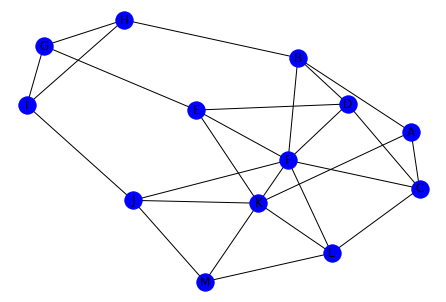

----BFS----Breadth First Search for the same graph:
True
['M', 'L', 'M', 'L', 'C', 'C', 'E', 'E', 'F', 'C', 'E', 'F', 'J', 'J', 'K', 'K', 'L', 'J', 'K', 'L', 'I', 'I', 'G', 'G', 'I', 'G', 'C', 'E', 'F', 'J', 'K', 'L', 'I', 'G', 'M', 'M', 'J', 'K', 'L', 'C', 'E', 'F', 'M', 'J', 'K', 'L', 'C', 'E', 'F']
None
['M', 'L', 'M', 'L', 'C', 'C', 'E', 'E', 'F', 'C', 'E', 'F', 'J', 'J', 'K', 'K', 'L', 'J', 'K', 'L', 'I', 'I', 'G', 'G', 'I', 'G', 'C', 'E', 'F', 'J', 'K', 'L', 'I', 'G', 'M', 'M', 'J', 'K', 'L', 'C', 'E', 'F', 'M', 'J', 'K', 'L', 'C', 'E', 'F']
None
['M', 'L', 'M', 'L', 'C', 'C', 'E', 'E', 'F', 'C', 'E', 'F', 'J', 'J', 'K', 'K', 'L', 'J', 'K', 'L', 'I', 'I', 'G', 'G', 'I', 'G', 'C', 'E', 'F', 'J', 'K', 'L', 'I', 'G', 'M', 'M', 'J', 'K', 'L', 'C', 'E', 'F', 'M', 'J', 'K', 'L', 'C', 'E', 'F']
None
['M', 'L', 'M', 'L', 'C', 'C', 'E', 'E', 'F', 'C', 'E', 'F', 'J', 'J', 'K', 'K', 'L', 'J', 'K', 'L', 'I', 'I', 'G', 'G', 'I', 'G', 'C', 'E', 'F', 'J', 'K', 'L', 'I', 'G', 'M', 'M', 'J', 'K',

KeyError: ignored

In [20]:
initNewGraph()
print("----BFS----Breadth First Search for the same graph:")
bfs('A','M')
print("Cost of the BFS = %d" %compute_cost())
print("BFS --- complete")


straight_line_data = pd.read_csv("straight-line-dist.csv",sep=",")
nx.draw(a_Algo('A','M',straight_line_data),node_color="blue",with_labels=True)
plt.show()